# Puzzle: Attention
## Practical Deep Learning
### February 12th, 2024


This is a small puzzle related to the concept of self-attention. The cell below contains hidden code that sets up a problem of self-attention, where the input sequence contains four tokens: `["dog", "cat", "airplane", "frog"]`.

In this toy problem, the key, value, and query matrices are set such that they should retrieve an *image* (encoded as a vector of length 300) corresponding to the input token. That is, the weights `(W_k, W_q, W_v)` have been initialized such that if self-attention is properly implemented, the output sequence contains the image corresponding to each token. Each entry in the output sequence can be visualized using matplotlib to ensure the implementation is correct.

<br>

We're essentially implementing the orange box from this diagram ("multi-head attention") but with a single head:

<img src="https://cdn-images-1.medium.com/max/1200/1*HunNdlTmoPj8EKpl-jqvBA.png" width="300">
<br>(From <i>Attention Is All You Need</i>, Vaswani et al., 2017)

--

Read through the code below and fill in the equation under Step #3.

In [ ]:
import math
import torch
#@title
#
# Links to image for each class.
#
ImageLinks = {}
ImageLinks["airplane"] = "http://www.clipartbest.com/cliparts/niX/n8X/niXn8XpAT.jpeg"
ImageLinks["frog"] = "http://2.bp.blogspot.com/-oXZiuBETc7s/TdQIx4pqk3I/AAAAAAAABGk/xa3Kyf9fixs/s320/large+full+color+green+spotted+frog.jpg"
ImageLinks["cat"] = "https://www.pngitem.com/pimgs/m/234-2345778_cat-clip-art-clipart-cat-kitten-clip-art.png"
ImageLinks["dog"] = "https://classroomclipart.com/image/static7/preview2/cute-golden-retriever-dog-clip-art-58068.jpg"

#
# Get images from the internet, normalize and store them in a dictionary.
#
from io import BytesIO
from PIL import Image

import numpy as np
import requests

def get_img_from_url(url, size):
  print("opening url:", url)
  img = Image.open(BytesIO(requests.get(url).content))
  img = img.resize(size)
  return torch.tensor(np.array(img) / 255.0, dtype=torch.float32)[..., :3]


ImageSize = (100, 100)
ImageBytes = { image_name: get_img_from_url(url, ImageSize) for (image_name, url) in ImageLinks.items()}

#
# Uncomment this code to look at the images.
#
import matplotlib.pyplot as plt

# for key in ImageBytes:
#   plt.imshow(ImageBytes[key])
#   plt.title(key)
#   plt.show()

#
# Initialize embeddings. Hopefully they're orthogonal.
#
HiddenDimension = 4 # Embeddings and key/query have same hidden size for us.

EmbeddingTable = {}
EmbeddingTable["dog"] = torch.tensor([1, 0, 0, 0], dtype=torch.float32)
EmbeddingTable["cat"] = torch.tensor([0, 1, 0, 0], dtype=torch.float32)
EmbeddingTable["airplane"] = torch.tensor([0, 0, 1, 0], dtype=torch.float32)
EmbeddingTable["frog"] = torch.tensor([0, 0, 0, 1], dtype=torch.float32)

#
# Create weight matrices.
#
W_q = torch.tensor(np.identity(HiddenDimension), dtype=torch.float32)

fuzzy = torch.normal(mean=torch.full((HiddenDimension,), 1.0), std=torch.full((HiddenDimension,), 0.0001)) # fuzzy ones around like [.99, 1.01]
W_k = W_q * fuzzy * 6 # *6 to make the resolution of the final images sharper

# Calculate value based on input sequence
input_sequence = ["dog", "cat", "airplane", "frog"]
_Value = torch.stack([torch.flatten(ImageBytes[word]) for word in input_sequence], dim=0)

x = torch.stack([EmbeddingTable[word] for word in input_sequence], dim=0)
W_v = x.T @ _Value
del x
del _Value
del input_sequence

opening url: http://www.clipartbest.com/cliparts/niX/n8X/niXn8XpAT.jpeg
opening url: http://2.bp.blogspot.com/-oXZiuBETc7s/TdQIx4pqk3I/AAAAAAAABGk/xa3Kyf9fixs/s320/large+full+color+green+spotted+frog.jpg
opening url: https://www.pngitem.com/pimgs/m/234-2345778_cat-clip-art-clipart-cat-kitten-clip-art.png
opening url: https://classroomclipart.com/image/static7/preview2/cute-golden-retriever-dog-clip-art-58068.jpg


In [ ]:
input_sequence = ["dog", "cat", "airplane", "frog", "dog", "dog", "dog", "airplane"]
# Available to use:
# embedding_table:
#   - EmbeddingTable (Dictionary[str, torch.Tensor])
#
# weight matrices:
#   - W_k  (float32 torch.Tensor)
#   - W_q  (float32 torch.Tensor)
#   - W_v  (float32 torch.Tensor)

1. Take words and convert them to embeddings. We have a dictionary (`EmbeddingTable`) that stores embeddings for each word. So we can use this to just convert the words and stack.

In [ ]:
import torch# 1. Create input sequence from embeddings of input text.
x = torch.stack([EmbeddingTable[word] for word in input_sequence], dim=0)
print(x.shape)

torch.Size([8, 4])


2. Compute key, value, and query from the input sequence.  Remember that keys/values/queries are *projections* – there is a linear transformation applied to each. So we do that here.

In [ ]:
Key = x @ W_k
Query = x @ W_q
Value = x @ W_v

3. Attention. Compute the output sequence of attention, which follows the following equation:

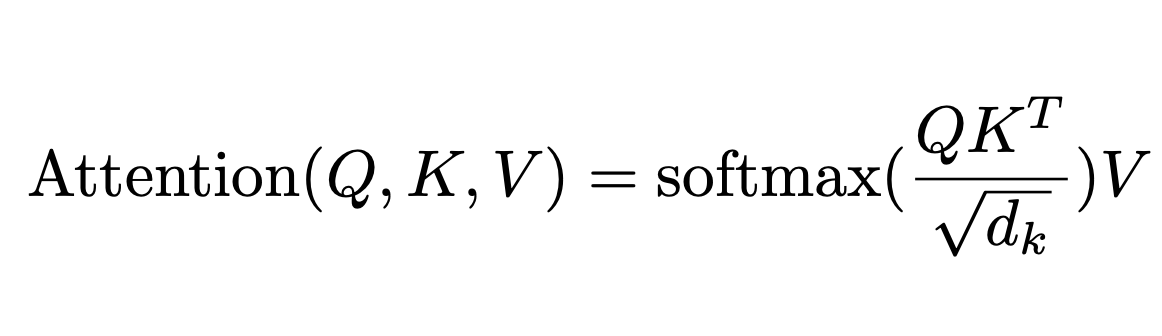

This is equation 1 from [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf).

In [ ]:
### TODO: Implement self-attention using the key, query, and value matrices.
###                 Store the output in a variable called `output_sequence`.



4. Visualize outputs. (This code will work properly once you've implemented attention. You'll know it when you see it.)

In [ ]:
f, axes = plt.subplots(1, len(input_sequence), figsize=(3 * len(output_sequence), 3))

for n, output_embedding in enumerate(output_sequence):
  output_image = output_embedding.reshape((100, 100, 3))
  axes[n].imshow(output_image)
plt.show()